## Recompute and insert UCRY hedge data due to Disjointedness 

In [1]:
import os
os.chdir("../../..")
print(os.getcwd())
import pandas as pd
from pathlib import Path
from postgres.utils import pd_to_pg

/Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index


In [2]:
data_dir = Path("pipelines/crypto_index/data")
part1 = pd.read_csv(data_dir / "ucry_hedge_index_2014_01_to_06.csv").drop(columns=["Unnamed: 0"])
part2 = pd.read_csv(data_dir / "ucry_hedge_index_2014_06_to_2021_12.csv")

In [3]:
combi_df = pd.concat([part1, part2], axis=0).sort_values(by=["start_date"]).reset_index(drop=True)

In [4]:
mu_1 = combi_df['doc_count'].mean()
sig_1 = combi_df['doc_count'].std()
ucry_hedge_df = combi_df.copy()
ucry_hedge_df['index_value'] = ((combi_df["doc_count"] - mu_1) / sig_1) + 100

In [10]:
ucry_hedge_df

,type,start_date,end_date,doc_count,index_value
0,bertweet-hedge,2013-12-30,2014-01-05,10.0,98.865099
1,bertweet-hedge,2014-01-06,2014-01-12,18.0,98.868875
2,bertweet-hedge,2014-01-13,2014-01-19,8.0,98.864155
3,bertweet-hedge,2014-01-20,2014-01-26,71.0,98.893891
4,bertweet-hedge,2014-01-27,2014-02-02,91.0,98.903331
...,...,...,...,...,...
427,bertweet-hedge,2021-11-29,2021-12-05,7976.0,102.625033
428,bertweet-hedge,2021-12-06,2021-12-12,7790.0,102.537241
429,bertweet-hedge,2021-12-13,2021-12-19,7782.0,102.533465
430,bertweet-hedge,2021-12-20,2021-12-26,6714.0,102.029372


<AxesSubplot:>

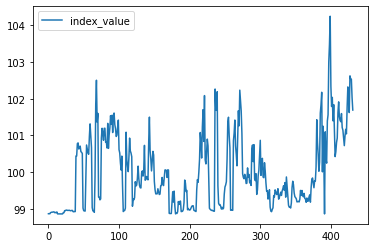

In [6]:
ucry_hedge_df[["start_date", "index_value"]].plot()

In [9]:
pd_to_pg(ucry_hedge_df, table_name="ucry_index")

2022-03-29 22:20:04,105 INFO sqlalchemy.engine.Engine select pg_catalog.version()


[03/29/22] INFO     select pg_catalog.version()                                  ]8;id=603283;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/sqlalchemy/engine/base.py\base.py]8;;\:]8;id=990479;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/sqlalchemy/engine/base.py#1761\1761]8;;\

2022-03-29 22:20:04,109 INFO sqlalchemy.engine.Engine [raw sql] {}


           INFO     [raw sql] {}                                                 ]8;id=891227;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/sqlalchemy/engine/base.py\base.py]8;;\:]8;id=502548;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/sqlalchemy/engine/base.py#1766\1766]8;;\

2022-03-29 22:20:04,113 INFO sqlalchemy.engine.Engine select current_schema()


           INFO     select current_schema()                                      ]8;id=541872;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/sqlalchemy/engine/base.py\base.py]8;;\:]8;id=379423;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/sqlalchemy/engine/base.py#1761\1761]8;;\

2022-03-29 22:20:04,115 INFO sqlalchemy.engine.Engine [raw sql] {}


           INFO     [raw sql] {}                                                 ]8;id=355859;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/sqlalchemy/engine/base.py\base.py]8;;\:]8;id=866985;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/sqlalchemy/engine/base.py#1766\1766]8;;\

2022-03-29 22:20:04,119 INFO sqlalchemy.engine.Engine show standard_conforming_strings


           INFO     show standard_conforming_strings                             ]8;id=702511;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/sqlalchemy/engine/base.py\base.py]8;;\:]8;id=605473;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/sqlalchemy/engine/base.py#1761\1761]8;;\

2022-03-29 22:20:04,120 INFO sqlalchemy.engine.Engine [raw sql] {}


           INFO     [raw sql] {}                                                 ]8;id=788076;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/sqlalchemy/engine/base.py\base.py]8;;\:]8;id=852023;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/sqlalchemy/engine/base.py#1766\1766]8;;\

2022-03-29 22:20:04,125 INFO sqlalchemy.engine.Engine select relname from pg_class c join pg_namespace n on n.oid=c.relnamespace where pg_catalog.pg_table_is_visible(c.oid) and relname=%(name)s


           INFO     select relname from pg_class c join pg_namespace n on        ]8;id=909083;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/sqlalchemy/engine/base.py\base.py]8;;\:]8;id=921616;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/sqlalchemy/engine/base.py#1761\1761]8;;\
                    n.oid=c.relnamespace where                                               
                    pg_catalog.pg_table_is_visible(c.oid) and relname=%(name)s               

2022-03-29 22:20:04,128 INFO sqlalchemy.engine.Engine [generated in 0.00254s] {'name': 'ucry_index'}


           INFO     [generated in 0.00254s] {'name': 'ucry_index'}               ]8;id=243086;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/sqlalchemy/engine/base.py\base.py]8;;\:]8;id=673668;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/sqlalchemy/engine/base.py#1766\1766]8;;\

2022-03-29 22:20:04,134 INFO sqlalchemy.engine.Engine BEGIN (implicit)


           INFO     BEGIN (implicit)                                              ]8;id=197583;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/sqlalchemy/engine/base.py\base.py]8;;\:]8;id=12907;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/sqlalchemy/engine/base.py#942\942]8;;\

2022-03-29 22:20:04,138 INFO sqlalchemy.engine.Engine INSERT INTO ucry_index (type, start_date, end_date, doc_count, index_value) VALUES (%(type)s, %(start_date)s, %(end_date)s, %(doc_count)s, %(index_value)s)


           INFO     INSERT INTO ucry_index (type, start_date, end_date,          ]8;id=607701;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/sqlalchemy/engine/base.py\base.py]8;;\:]8;id=349262;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/sqlalchemy/engine/base.py#1761\1761]8;;\
                    doc_count, index_value) VALUES (%(type)s, %(start_date)s,                
                    %(end_date)s, %(doc_count)s, %(index_value)s)                            

2022-03-29 22:20:04,141 INFO sqlalchemy.engine.Engine [generated in 0.00332s] ({'type': 'bertweet-hedge', 'start_date': '2013-12-30', 'end_date': '2014-01-05', 'doc_count': 10.0, 'index_value': 98.8650989094847}, {'type': 'bertweet-hedge', 'start_date': '2014-01-06', 'end_date': '2014-01-12', 'doc_count': 18.0, 'index_value': 98.86887489142494}, {'type': 'bertweet-hedge', 'start_date': '2014-01-13', 'end_date': '2014-01-19', 'doc_count': 8.0, 'index_value': 98.86415491399964}, {'type': 'bertweet-hedge', 'start_date': '2014-01-20', 'end_date': '2014-01-26', 'doc_count': 71.0, 'index_value': 98.89389077177903}, {'type': 'bertweet-hedge', 'start_date': '2014-01-27', 'end_date': '2014-02-02', 'doc_count': 91.0, 'index_value': 98.90333072662962}, {'type': 'bertweet-hedge', 'start_date': '2014-02-03', 'end_date': '2014-02-09', 'doc_count': 101.0, 'index_value': 98.90805070405493}, {'type': 'bertweet-hedge', 'start_date': '2014-02-10', 'end_date': '2014-02-16', 'doc_count': 101.0, 'index_valu

           INFO     [generated in 0.00332s] ({'type': 'bertweet-hedge',          ]8;id=401176;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/sqlalchemy/engine/base.py\base.py]8;;\:]8;id=691208;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/sqlalchemy/engine/base.py#1766\1766]8;;\
                    'start_date': '2013-12-30', 'end_date': '2014-01-05',                    
                    'doc_count': 10.0, 'index_value': 98.8650989094847},                     
                    {'type': 'bertweet-hedge', 'start_date': '2014-01-06',                   
                    'end_date': '2014-01-12', 'doc_count': 18.0, 'index_value':              
                    98.86887489142494}, {'type': 'bertweet-hedge', 'start_date':             
                    '2014-01-13', 'end_date': '2014-01-19', 'doc_count': 8.0,                
                    'index_value': 98.86415491399964}, {'type':                              
                    'bertweet-hedge', 'start_date': '2014-01-20', 'end_date':                
                    '2014-01-26', 'doc_count': 71.0, 'index_value':                          
                    98.89389077177903}, {'type': 'bertweet-hedge', 'start_date':             
                    '2014-01-27', 'end_date': '2014-02-02', 'doc_count': 91.0,               
                    'index_value': 98.90333072662962}, {'type':                              
                    'bertweet-hedge', 'start_date': '2014-02-03', 'end_date':                
                    '2014-02-09', 'doc_count': 101.0, 'index_value':                         
                    98.90805070405493}, {'type': 'bertweet-hedge', 'start_date':             
                    '2014-02-10', 'end_date': '2014-02-16', 'doc_count': 101.0,              
                    'index_value': 98.90805070405493}, {'type':                              
                    'bertweet-hedge', 'start_date': '2014-02-17', 'end_date':                
                    '2014-02-23', 'doc_count': 118.0, 'index_value':                         
                    98.91607466567793}  ... displaying 10 of 432 total bound                 
                    parameter sets ...  {'type': 'bertweet-hedge', 'start_date':             
                    '2021-12-20', 'end_date': '2021-12-26', 'doc_count': 6714.0,             
                    'index_value': 102.02937177540522}, {'type':                             
                    'bertweet-hedge', 'start_date': '2021-12-27', 'end_date':                
                    '2022-01-02', 'doc_count': 6000.0, 'index_value':                        
                    101.69236538723887})                                                     

2022-03-29 22:20:04,178 INFO sqlalchemy.engine.Engine COMMIT


           INFO     COMMIT                                                       ]8;id=10852;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/sqlalchemy/engine/base.py\base.py]8;;\:]8;id=630728;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/.venv/crypto-uncertainty-index-SX872G0E-py3.8/lib/python3.8/site-packages/sqlalchemy/engine/base.py#1002\1002]8;;\

           INFO     Number of rows in ucry_index affected: 432                    ]8;id=71388;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/postgres/utils.py\utils.py]8;;\:]8;id=414915;file:///Users/christopherliew/Desktop/Y4S1/HT/crypto_uncertainty_index/postgres/utils.py#42\42]8;;\